## J124 Data Journalism Final Project
For this exploratory data analysis we will be looking at a dataset that contains the list of wildfires in California between 2013 and 2020 with information on location. In this notebook we will use Python to answer the following five question: 
1. Has the frequency of fires in California changed over time?
2. What counties in California experience the most fires?
3. Which counties have the most major incidents?
4. Where were the worst fires in 2019?
5. Has fire damage increased in California over time?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib.patches import Rectangle

import seaborn as sns

matplotlib.style.use('fivethirtyeight')

Reading in the California Fire Incidents CSV :

In [10]:
df = pd.read_csv("California_Fire_Incidents.csv")
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [127]:
# Check for NaN values in columns (1636 total rows)
print('There are {} rows'.format(len(df)))
for col in df.columns:
    col_i = df[col]
    nan_rows = col_i[col_i.isna()]
    print('There are {} NaN values in the {} column'.format(len(nan_rows), col))

There are 1636 rows
There are 3 NaN values in the AcresBurned column
There are 0 NaN values in the Active column
There are 0 NaN values in the AdminUnit column
There are 1608 NaN values in the AirTankers column
There are 0 NaN values in the ArchiveYear column
There are 0 NaN values in the CalFireIncident column
There are 0 NaN values in the CanonicalUrl column
There are 1352 NaN values in the ConditionStatement column
There are 1525 NaN values in the ControlStatement column
There are 0 NaN values in the Counties column
There are 0 NaN values in the CountyIds column
There are 1465 NaN values in the CrewsInvolved column
There are 1513 NaN values in the Dozers column
There are 1445 NaN values in the Engines column
There are 59 NaN values in the Extinguished column
There are 1615 NaN values in the Fatalities column
There are 0 NaN values in the Featured column
There are 0 NaN values in the Final column
There are 1624 NaN values in the FuelType column
There are 1552 NaN values in the Helico

## Question 1: Has the frequency of fires in California changed over time?

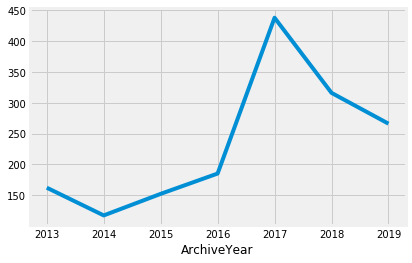

In [12]:
fires = df.groupby('ArchiveYear').size()
fires.plot();

In [13]:
df['Year Started'] = df.Started.apply(lambda x: int(x[:4]))

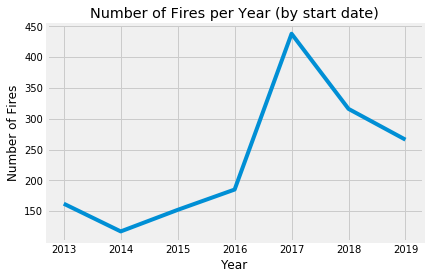

In [14]:
df['Year Started'].value_counts().sort_index().plot();
plt.title("Number of Fires per Year (by start date)");
plt.ylabel("Number of Fires");
plt.xlabel("Year");

## Question 2: What counties in California experience the most fires?
To answer this, I grouped the dataset by counties and used a count as my aggregate function - essentially performing the same calculation as a pivot table in Excel/Sheets. I then saved this table into a CSV and copied the data into Data Wrapper to make the choropleth map below. 

In [137]:
# Number of fires by county
counties = df.groupby("Counties").count().rename(columns={"UniqueId":"Count"})[["Count"]].reset_index(level='Counties')
counties.to_csv("fires_counties.csv")
counties.sort_values(by=['Count'],ascending=False).head()

,Counties,Count
32,Riverside,146
36,San Diego,89
3,Butte,66
43,Shasta,64
38,San Luis Obispo,64


![alt text](counties.png)

## Question 3: Which counties have the most major incidents?
In order to answer this question, I first filtered for major incidents (True values in the MajorIncident column), then grouped by counties with the same aggregation method used in the previous question, and then sorted to see the five counties with the most major incidents. 

It makes sense that Butte, San Diego, Shasta, and Riverside appeared on this list because these counties were also among the leaders in most fires. However, I was surprised to see that only 12% of the fires in Riverside (the county with the most fires) were considered major incidents. 

In [136]:
# Filter for major incidents
major_incidents = df[df["MajorIncident"] == True]

# Number of fires by county
major_incidents_counties = major_incidents.groupby("Counties").count().rename(columns={"UniqueId":"Count"})[["Count"]].reset_index(level='Counties')
major_incidents_counties.sort_values(by=['Count'],ascending=False).head()

,Counties,Count
2,Butte,28
32,San Diego,27
38,Shasta,26
13,Lake,21
28,Riverside,18


# Question 4: Where were the worst fires in 2019?
I answered this question by filtering for fires that started in 2019 that were major incidents. There were 29 total fires that fit this description, so I needed to find find another metric to measure the "worst fires". Injuries seemed like a natural way to measure severity of fires but this dataset lacked a lot of values in that column. Instead I used "AcresBurned" as a proxy for severity - this revealed that the Kincade Fire in Sonoma County was the worst fire with nearly 78,000 acres burned.

In [146]:
# Filter for 2019 fires and major incidents
fires_2019 = df[df["Year Started"] == 2019]
major_2019 = fires_2019[fires_2019["MajorIncident"] == True]
print('There were {} major incidents in 2019'.format(len(major_2019)))

There were 29 major incidents in 2019


In [149]:
# Sort by AcresBurned and use this feautre as a heuristic to measure severity of incident
major_2019.sort_values(by=['AcresBurned'],ascending=False).head(1)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders,Year Started
1396,77758.0,False,CAL FIRE Sonoma-Lake-Napa Unit,NaN,2019,True,/incidents/2019/10/23/kincade-fire/,<p>All evacuations have been lifted at this ti...,NaN,Sonoma,...,2019-10-23T21:27:00Z,Finalized,60.0,374.0,NaN,0.0,809d101c-8aa3-4a53-bf20-f38ae7ec7941,2019-11-20T11:02:52.127Z,2.0,2019


In [165]:
df.groupby(['Counties']).agg({'AcresBurned': 'sum'}).sort_values(by=['AcresBurned'],ascending=False).head()

,AcresBurned
Counties,
Lake,582784.0
Mendocino,512712.0
Trinity,481048.0
Colusa,459316.0
Shasta,448527.0


## Question 5: Has fire damage increased in California over time?
This was similar to our first question but with an different aggregating function. The findings were pretty surprising, the dramatic increase over time of total acres burned per year aligned with conventional wisdom. However, the sharp drop off in 2019 was completely shocking. This dropoff could be attributed to incomplete data for 2019.

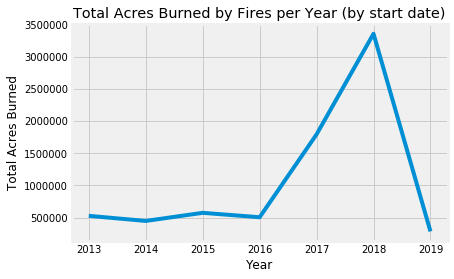

In [161]:
df.groupby(['Year Started']).agg({'AcresBurned': 'sum'}).plot(legend=None);
plt.title("Total Acres Burned by Fires per Year (by start date)");
plt.ylabel("Total Acres Burned");
plt.xlabel("Year");

## Story Pitch: 

Using this data analysis as a stepping off point, I could develop a story on the difference between being a city firefighter and wildland firefighter. City firefighters are trained in building escapes and tackling the source of fires, these firefighters are more common in urban and suburban areas (i.e. San Diego county). Wildland firefighters on the other hand deal with much larger fires with the goal of stopping the spread and minimizing property and landscape damages, these firefighters are typically station in rural counties like Sonoma, Lake, Shasta, and Colusa.

We found in our analysis that there were some suburban and urban heavy counties experience the most fires, but the most damaging fires were in rural areas. It would be interesting to compare and contrast the role of firefighters in these areas who share the reality that fires are increasing. 

My key sources would be two firefighters: Joe Lerdal & Matt Nielsen. I have been close friends with Joe since our freshman year at Cal, over the past few summers he has served a wildland firefighter in Northern California and Oregon. His experience working to contain deadly fires in these rural environments would be very informative for this story. Nielsen, the father of one of my fraternity brothers and high school classmates, is a Battalion Chief for a fire station in the Ocean Beach neighborhood of San Diego. He has worked with this fire station since 1996 and his extensive experience would provide a valuable perspective for this story. 

Other sources I would need to develop this story would be more complete data on equiptment used during the fire (i.e. Dozers, Engines, Helicopters columns) and county/station specific data on firefighter injuries and deaths. The equipment data will give us a better picture on the severity of incidents and tell us how prepared firefighters are. The info on firefighter deaths/injuries would reveal the difference in danger between city and wildland firefighting.